## Практическое занятие: анализ данных книги

Попробуем построить ещё несколько интересных зависимостей из книги "Анна Каренина". Для начала, считываем книгу, как мы это делали на лекции:

In [60]:
text = open('../../../data/akar_en.txt','r',encoding='utf-8').readlines()
text = [ x.strip() for x in text ]

Чтобы не возникало путаницы с падежами, мы будем использовать англоязычную версию романа.

Получаем последовательность слов:

In [90]:
def split(s):
    for z in list(' .,;:?!-()"’\'—/_'):
        s = s.replace(z,' ')
    return s.split()

words = split(' '.join(text).lower())
words[:10]

['\ufeff',
 'the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'anna',
 'karenina',
 'by',
 'leo']

### Задача 1: Построить распределение слов по длине

Необходимо построить график, показывающий, сколько слов заданной длины есть в книге.

Задача очень похожа на составление частотного словаря. Для удобства, реализуем функцию построения частотного словаря любой последовательности:

In [91]:
def freq(s):
    res = { }
    for x in s:
        if x in res:
            res[x] = res[x]+1
        else:
            res[x] = 1
    return res

freq(words)

{'\ufeff': 1,
 'the': 17622,
 'project': 91,
 'gutenberg': 98,
 'ebook': 10,
 'of': 8704,
 'anna': 797,
 'karenina': 44,
 'by': 1106,
 'leo': 4,
 'tolstoy': 4,
 'this': 1375,
 'is': 1412,
 'for': 2714,
 'use': 74,
 'anyone': 121,
 'anywhere': 19,
 'at': 2920,
 'no': 901,
 'cost': 19,
 'and': 12750,
 'with': 3786,
 'almost': 122,
 'restrictions': 3,
 'whatsoever': 2,
 'you': 3118,
 'may': 149,
 'copy': 12,
 'it': 4352,
 'give': 185,
 'away': 432,
 'or': 612,
 're': 296,
 'under': 166,
 'terms': 43,
 'license': 16,
 'included': 3,
 'online': 4,
 'www': 10,
 'org': 11,
 'title': 7,
 'author': 9,
 'release': 2,
 'date': 9,
 'july': 6,
 '01': 1,
 '1998': 1,
 '[ebook': 1,
 '#1399]': 1,
 'last': 192,
 'updated': 2,
 '28': 8,
 '2019': 1,
 'language': 10,
 'english': 66,
 'character': 35,
 'set': 154,
 'encoding': 1,
 'utf': 1,
 '8': 13,
 '***': 4,
 'start': 24,
 'produced': 12,
 'david': 4,
 'brannan': 2,
 'andrew': 2,
 'sly': 10,
 'widger': 2,
 'translated': 2,
 'constance': 1,
 'garnett': 1,

Для вычисления частотного словаря длин используем функцию `map` для построения последовательности длин слов:

In [92]:
r = freq(map(len,words))
r

{1: 22445,
 3: 93396,
 7: 24535,
 9: 9170,
 5: 38718,
 2: 61474,
 4: 64904,
 8: 15293,
 6: 25566,
 12: 2452,
 10: 6507,
 11: 2518,
 13: 768,
 14: 861,
 15: 114,
 16: 35,
 17: 5,
 19: 2}

Далее используем приём из лекции для сортировки и построения графика:

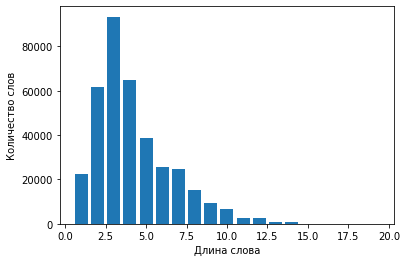

In [93]:
import matplotlib.pyplot as plt

def selector(n):
    return lambda x: x[n]

rs = sorted(r.items(),key=selector(0))
plt.bar(list(map(selector(0),rs)),list(map(selector(1),rs)))
plt.xlabel('Длина слова')
plt.ylabel('Количество слов')
plt.show()


Код выше нуждается в некоторых пояснениях. Определённая нами функция `selector(n)` возвращает функцию, которая выбирает n-й компонент списка. Нам нужно сначала отсортировать последовательность по длине слова - поэтому мы передаём функции `sorted` в качестве аргумента `selector(0)`.

Для построения графика нам нужно передать функции `bar` две последовательности - x и y. Для этого нам нужно из последовательности пар получить две последовательности - первых и вторых координат. Это можно сделать с помощью функции `map` и определённой ранее функции `selector`.

Если этот код слишком сложен для понимания, можно реализовать тоже самое несколько проще:

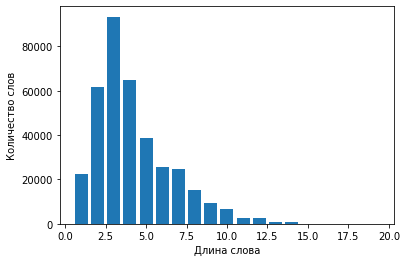

In [94]:
rs = sorted(r.items(),key=lambda x: x[0])
plt.bar([x[0] for x in rs],[x[1] for x in rs])
plt.xlabel('Длина слова')
plt.ylabel('Количество слов')
plt.show()


В данном примере мы учитывли повторные вхождения слов в текст. Если нам нужно посчитать уникальные вхождения слов, то мы можем использовать структуру данных "множество", чтобы убрать дубликаты:

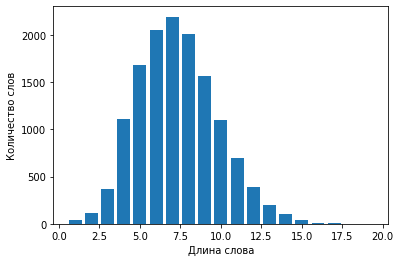

In [95]:
uniq_words = set(words)
r = freq(map(len,uniq_words))
rs = sorted(r.items(),key=lambda x: x[0])
plt.bar([x[0] for x in rs],[x[1] for x in rs])
plt.xlabel('Длина слова')
plt.ylabel('Количество слов')
plt.show()


Получим все уникальные слова длины 7:

In [96]:
[w for w in uniq_words if len(w)==7]

['coughed',
 'luggage',
 'petites',
 'economy',
 'kritsky',
 'assures',
 'frankly',
 'critics',
 'largest',
 'swelled',
 'brought',
 'rejoice',
 'notions',
 'streets',
 'desires',
 'blurted',
 'appétit',
 'doctors',
 'trusted',
 'scatter',
 'arseny”',
 'arrange',
 'banking',
 'private',
 'outlook',
 'popping',
 'dearest',
 'partner',
 'bonnets',
 'creator',
 'oftener',
 'ranging',
 'slyness',
 'failing',
 'grudged',
 'defiant',
 'schemes',
 'rupture',
 'smashed',
 'compost',
 'actress',
 'concise',
 'service',
 'studded',
 'torment',
 'tempest',
 'culture',
 'ethical',
 'kneaded',
 'distort',
 'collect',
 'expects',
 'pleaded',
 'unlucky',
 'brushed',
 'shutter',
 'asserts',
 'haunted',
 'auction',
 '“whence',
 'usually',
 'grayish',
 'fidgety',
 'regular',
 'savages',
 'formats',
 'planted',
 'inexact',
 'reviews',
 'reasons',
 'serious',
 'brownie',
 'grafted',
 'figured',
 'arcades',
 'brooded',
 'patting',
 'journey',
 'kindest',
 'corners',
 'nursing',
 'timidly',
 'against',
 'li

Из любопытства найдём длину самого длинного слова, и посмотрим, что это за слово:

In [97]:
ml = max(map(len,uniq_words))
print(f"Max len={ml}, word = {[x for x in uniq_words if len(x)==ml]}")

Max len=19, word = ['straightforwardness']


### Задача 2: Найти все имена собственные в тексте

Имена собственные - это слова, которые начинаются с большой буквы. Однако, в тексте также присутствуют другие слова, начинающиеся с большой буквы - те, которые стоят в начале предложения. Поэтому будем считать именами собственными те слова, которые **всегда** пишутся с большой буквы.

Для начала получим список слов с учётом регистра, а также определим функцию для проверки того, начинается ли слово с большой буквы.

In [98]:
words = split(' '.join(text))
low_words = split(' '.join(text).lower())

def hiword(x):
    return x[0].isupper() and len(x)>3 and x[1:].islower()

[x for x in words if hiword(x)]

['Project',
 'Gutenberg',
 'Anna',
 'Karenina',
 'Tolstoy',
 'This',
 'Project',
 'Gutenberg',
 'License',
 'Title',
 'Anna',
 'Karenina',
 'Author',
 'Tolstoy',
 'Release',
 'Date',
 'July',
 'Last',
 'Updated',
 'July',
 'Language',
 'English',
 'Character',
 'Produced',
 'David',
 'Brannan',
 'Andrew',
 'David',
 'Widger',
 'Tolstoy',
 'Translated',
 'Constance',
 'Garnett',
 'Contents',
 'Chapter',
 'Happy',
 'Everything',
 'Oblonskys',
 'French',
 'This',
 'Every',
 'Oblonskys',
 'English',
 'Three',
 'Prince',
 'Stepan',
 'Arkadyevitch',
 'Oblonsky',
 'Stiva',
 'Alabin',
 'Darmstadt',
 'Darmstadt',
 'American',
 'Darmstadt',
 'America',
 'Alabin',
 'Stepan',
 'Arkadyevitch',
 'There',
 'That',
 'Most',
 'Dolly',
 'Stepan',
 'Arkadyevitch',
 'There',
 'Instead',
 'Stepan',
 'Arkadyevitch',
 'This',
 'Catching',
 'Dolly',
 'Since',
 'Stepan',
 'Arkadyevitch',
 'What',
 'Chapter',
 'Stepan',
 'Arkadyevitch',
 'Possibly',
 'Stepan',
 'Arkadyevitch',
 'That',
 'There',
 'Mlle',
 'Rola

Теперь, собственно, уберём слова, которые присутствуют в тексте и начинаются с маленькой буквы:

In [76]:
[x for x in words if hiword(x) and x.lower() not in words]

['Anna',
 'Karenina',
 'Tolstoy',
 'Anna',
 'Karenina',
 'Tolstoy',
 'July',
 'Updated',
 'July',
 'English',
 'David',
 'Brannan',
 'Andrew',
 'David',
 'Widger',
 'Tolstoy',
 'Constance',
 'Garnett',
 'Oblonskys’',
 'French',
 'Oblonskys',
 'English',
 'Stepan',
 'Arkadyevitch',
 'Oblonsky',
 'Stiva',
 'Alabin',
 'Darmstadt',
 'Darmstadt',
 'American',
 'Darmstadt',
 'America',
 'Alabin',
 'Stepan',
 'Arkadyevitch’s',
 'Dolly',
 'Stepan',
 'Arkadyevitch',
 'Stepan',
 'Arkadyevitch',
 'Dolly',
 'Stepan',
 'Arkadyevitch',
 'Stepan',
 'Arkadyevitch',
 'Stepan',
 'Arkadyevitch',
 'Mlle',
 'Roland',
 'Stepan',
 'Arkadyevitch',
 'Matvey',
 'Matvey',
 'Stepan',
 'Arkadyevitch',
 'Matvey',
 'Stepan',
 'Arkadyevitch',
 'Matvey',
 'Stepan',
 'Arkadyevitch’s',
 'Matvey',
 'Sunday',
 'Stepan',
 'Arkadyevitch',
 'Matvey',
 'Anna',
 'Arkadyevna',
 'Matvey',
 'Anna',
 'Arkadyevna',
 'Matvey',
 'Stepan',
 'Arkadyevitch',
 'Matvey',
 'Darya',
 'Alexandrovna',
 'Alexandrovna',
 'Matvey',
 'Matvey',
 '

Можно заметить, что предыдущая ячейка выполняется достаточно долго. Всё дело в квадратичной сложности алгоритма, поскольку для каждого слова из набора слов необходимо совершить просмотр всего набора ещё раз.

Того же результата можно было бы более эффективно достичь с помощью операций над множествами:

In [99]:
def mkhi(x):
    return x[0].upper()+x[1:]

h1 = set(x for x in words if hiword(x))
h2 = set(x.lower() for x in h1)
candidates = h2-set(words)
candidates


{'aber',
 'adam',
 'agafea',
 'alabin',
 'alaska',
 'alexander',
 'alexandrovitch',
 'alexandrovna',
 'alexeitch',
 'alexey',
 'alexeyevitch”',
 'alexey”',
 'alexyevitch',
 'aline',
 'aliosha',
 'alioshka',
 'allons',
 'almighty',
 'america',
 'american',
 'analyzing',
 'andreevna',
 'andrew',
 'andrey',
 'anita',
 'anitchkin',
 'anitchkin”',
 'anna',
 'anne',
 'annie',
 'annie”',
 'annushka',
 'anyway”',
 'apostle',
 'apostolic',
 'apraksina',
 'apuhtin',
 'arbaty',
 'arbeitskur',
 'archive',
 'arcturus',
 'arhip',
 'arkadyevitch',
 'arkadyevna',
 'arkadyevna”',
 'arseny',
 'arseny”',
 'asia',
 'astafieva',
 'athenian',
 'atlas',
 'attic',
 'august',
 'auntie',
 'austrian',
 'automedon',
 'avenieva',
 'babylon',
 'bach',
 'baden',
 'bakers',
 'baltic',
 'banquet',
 'bartnyansky',
 'beaumarchais',
 'beethoven',
 'begier',
 'beist',
 'bentham',
 'berkoot',
 'berkoshov',
 'bertenev',
 'betsy',
 'bezzubov',
 'bezzubova',
 'bibish',
 'bible',
 'birthdays',
 'biryuzovsky',
 'bobrishtchevs',

Мы видим, что в этот набор входят такие слова, как **собравшись** - которые по случаю вошли в набор только из-за того, что они встретились лишь один раз в начале предложения. Уберём отсюда слова, которые входят в текст меньше 5 раз:

In [88]:
fd = freq(low_words)
names = candidates - set(x for x in low_words if fd[x]<5)
names

{'agafea',
 'alexander',
 'alexandrovitch',
 'alexandrovna',
 'alexey',
 'andreevna',
 'anna',
 'annushka',
 'archive',
 'arkadyevitch',
 'arkadyevna',
 'bartnyansky',
 'betsy',
 'bezzubov',
 'borissovna',
 'bryansky',
 'christ',
 'christian',
 'christianity',
 'darya',
 'dmitrievitch',
 'dolly',
 'duchess',
 'england',
 'english',
 'englishman',
 'enoch',
 'ergushovo',
 'europe',
 'european',
 'flerov',
 'french',
 'frenchman',
 'frenchwoman',
 'frou',
 'fyodor',
 'gagin',
 'german',
 'gladiator',
 'golenishtchev',
 'gospel',
 'grinevitch',
 'grisha',
 'hoole',
 'italian',
 'ivan',
 'ivanovitch',
 'ivanovna',
 'john',
 'july',
 'june',
 'kamerovsky',
 'kapitonitch',
 'karenin',
 'karenina',
 'karenins',
 'katavasov',
 'katerina',
 'katya',
 'kirillovitch',
 'kitty',
 'konstantin',
 'korney',
 'korsunsky',
 'kostya',
 'kouzma',
 'koznishev',
 'krak',
 'kritsky',
 'kuzovlev',
 'landau',
 'laska',
 'levin',
 'levins',
 'lidia',
 'lily',
 'linon',
 'liza',
 'lizaveta',
 'lukitch',
 'lvov'